# Gradient descent
for some function $F(\mathbf{x}), \mathbf{x} \equiv (x_1,\cdots,x_n)$, we may minimize moving in the direction of the negative gradient $-\nabla F(\mathbf{x})$, i.e.
$$
\mathbf{x}_{k+1} =  \mathbf{x}_k -\gamma_k \nabla  F(\mathbf{x_k}),
$$
where $\gamma_k$ is the learning rate.

iterations_max_exceeded=False, tolerance_met=True


Text(0, 0.5, 'y')

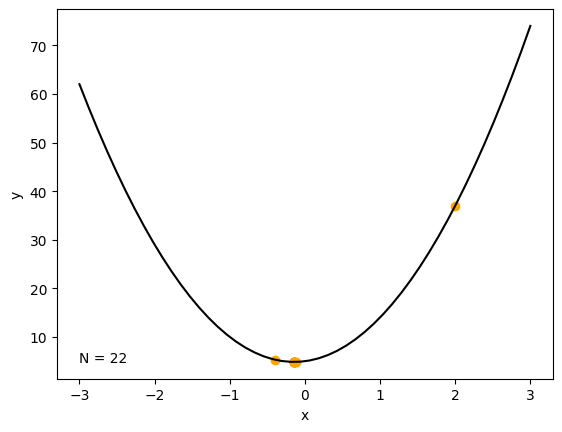

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class GradientDescent:
  """
  Find local minima with Gradient Descent
  """
  def __init__(self, learning_rate: float, grad_func: callable, 
               init_guess: float | np.ndarray):
    """
    Initialize GradientDescent


    Parameters
    ----------
    learning_rate: float
      Learning rate.
    grad_func: callable
      gradient of func to be optimized
    init_guess: float
      initial guess for minima input
    """
    self.learning_rate = learning_rate
    self.grad_func = grad_func
    self.init_guess = init_guess
  
  def advance(self, guess):
    """
    Advance minima value guess
    """
    return guess - self.learning_rate*self.grad_func(guess)
  
  def __call__(self, iterations_max: int, tolerance: float):
    """
    Compute minima
    """
    iteration = 0
    guess = self.init_guess
    guesses = [guess]
    while True:
      new_guess = self.advance(guess)
      change = new_guess - guess
      guesses.append(new_guess)
      iteration += 1
      guess = new_guess
      if iteration >= iterations_max or np.abs(change).all() < tolerance:
        break
    iterations_max_exceeded = iterations_max <= iteration
    tolerance_met = np.abs(change) < tolerance
    return np.array(guesses, dtype=float), iterations_max_exceeded, tolerance_met


def simple_polynomial(x: np.ndarray|float):
  return 5 + 2*x + 7*x**2

def simple_polynomial_grad(x: np.ndarray|float):
  return 2 + 14*x


instance = GradientDescent(0.08, simple_polynomial_grad, 2)
guesses, iterations_max_exceeded, tolerance_met = instance(100, 1e-5)
print(f"{iterations_max_exceeded=}, {tolerance_met=}")
x = np.linspace(-3,3,50)
f = simple_polynomial(x)
plt.plot(x,f,color='black')
plt.scatter(guesses,simple_polynomial(guesses),color="orange")
plt.text(x.min(),f.min(), f"N = {guesses.shape[0]}")
plt.xlabel("x")
plt.ylabel("y")




iterations_max_exceeded=False, tolerance_met=array([False,  True, False])
[4.25491405 2.         7.04886148]


Text(-5.0, 4.857667584940312, 'N = 17772')

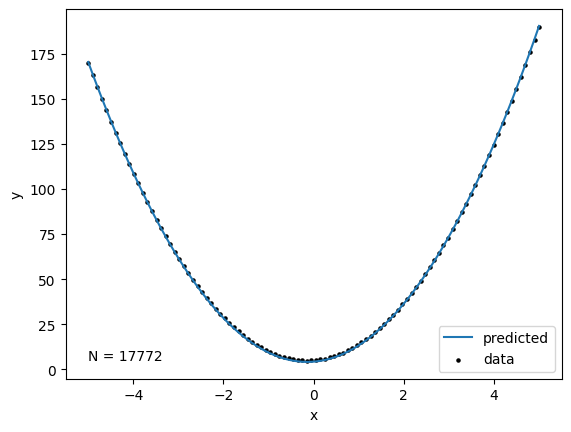

In [84]:
from sklearn.model_selection import train_test_split
from functools import partial
import numpy as np

def compute_features(inputs: np.ndarray, degree):
  """
  Compute design matrix
  """
  features = np.empty((inputs.shape[0],degree+1),dtype=float)
  for i, input in enumerate(inputs):
    for j in range(degree+1):
      features[i, j] = input**j
  return features


input = np.linspace(-5,5,100)
output = simple_polynomial(input)
features = compute_features(input, 2)

def cost_func_grad_ols(features, output, parameters):
  return 2 * features.T @ ( (features @ parameters)- output)


def gradient_descent_ols(input: np.ndarray, output: np.ndarray, degree: int, 
                         n_maxiter: int, tol: float, learning_rate: float):
  """
  Compute parameters as predicted by OLS gradient descent.


  Parameters
  ----------
  input: np.ndarray
    Input.
  output: np.ndarray
    Output.
  degree: int
    maximum degree complexity for model

  
  """
  features = compute_features(input, degree)
  cost_func_grad = lambda parameters: \
    cost_func_grad_ols(features, output, parameters)
  grad_descent_params = GradientDescent(learning_rate, cost_func_grad, 
                                        np.ones(degree+1))
  return grad_descent_params(n_maxiter, tol)


parameters, iterations_max_exceeded, tolerance_met = gradient_descent_ols(input, output, 2, 100000, 1e-8, 1e-6)
print(f"{iterations_max_exceeded=}, {tolerance_met=}")
best_parameters = parameters[-1]
print(best_parameters)
predicted = features @ best_parameters
plt.plot(input,predicted, label="predicted")
plt.scatter(input,output,color='black', s=5, label="data")
plt.legend(loc='lower right')
plt.xlabel("x")
plt.ylabel("y")
plt.text(input.min(), output.min(), f"N = {parameters.shape[0]}")




# Gradient Descent with momentum
we alter Gradient Descent algorithm to include a momentum/memory term
$$
\mathbf{x}_{k+2} = \mathbf{x}_{k+1} + (\mathbf{x}_{k+1} - \mathbf{x}_k)\gamma - \gamma_k \nabla F(\mathbf{x}_{k+1}),
$$
where $\gamma$ is the momentum parameter.

iterations_max_exceeded=False, tolerance_met=True


Text(0, 0.5, 'y')

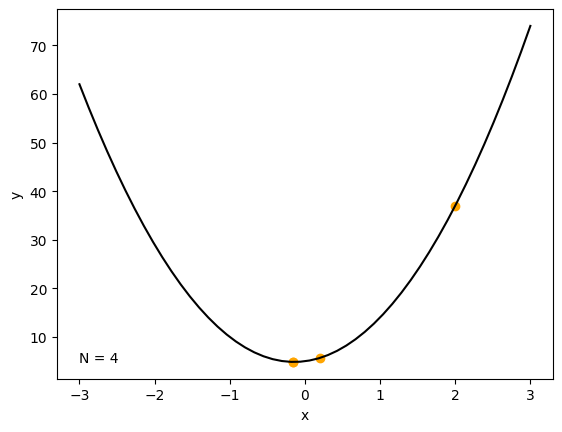

In [ ]:
class GradientDescentWithMomentum:
  """
  Find local minima with Gradient Descent With Momentum
  """
  def __init__(self, learning_rate: float, momentum_parameter: float, 
               grad_func: callable, init_guess: float | np.ndarray):
    self.learning_rate = learning_rate
    self.momentum_parameter = momentum_parameter
    self.grad_func = grad_func
    self.init_guess = init_guess
  
  def advance(self, guess, change):
    """
    Advance minima value guess
    """
    return guess - self.learning_rate*self.grad_func(guess) + change*self.momentum_parameter
  
  def __call__(self, iterations_max: int, tolerance: float):
    """
    Compute minima
    """
    iteration = 0
    change = 0
    guess = self.init_guess
    guesses = [guess]
    while True: 
      new_guess = self.advance(guess, change)
      change = new_guess - guess
      guesses.append(new_guess)
      iteration += 1
      guess = new_guess
      if iteration >= iterations_max or np.abs(change) < tolerance:
        break
    iterations_max_exceeded = iterations_max <= iteration
    tolerance_met = np.abs(change) < tolerance
    return np.array(guesses, dtype=float), iterations_max_exceeded, tolerance_met


instance = GradientDescentWithMomentum(0.06, 0.04, simple_polynomial_grad, 2)
guesses, iterations_max_exceeded, tolerance_met = instance(100, 1e-5)
print(f"{iterations_max_exceeded=}, {tolerance_met=}")
x = np.linspace(-3,3,50)
f = simple_polynomial(x)
plt.plot(x,f,color='black')
plt.scatter(guesses,simple_polynomial(guesses),color="orange")
plt.text(x.min(),f.min(), f"N = {guesses.shape[0]}")
plt.xlabel("x")
plt.ylabel("y")




# Stochastic Gradient Descent
for N data points $(\mathbf{x}_0, \mathbf{x}_1, \dots, \mathbf{x}_{n-1})$, we can parition into $M$ batches, e.g. for 10 datapoints we have $B_1 = (\mathbf{x}_1, \mathbf{x}_2),\dots, B_5 = (\mathbf{x}_9, \mathbf{x}_{10})$